In [2]:
models <- c('m1','m2','m3','m4','m5','m6')

SF=ZN <- list()
for(i in 1:length(models)){
    SF[[i]] <- read.csv(paste('fit',models[i],'seaflow.csv',sep='_'))
    ZN[[i]] <- read.csv(paste('fit',models[i],'zinser.csv',sep='_'))
}

In [10]:
dim(ZN[[1]])

[1] 4000  709

In [12]:
pars <- c('gamma_max','respiration','E_star','w_ini_mu','w_ini_sigma','divrate')

PARS_sf=PARS_zn   <- array(NA,dim=c(dim(ZN[[1]])[1],length(pars),length(models)))
#colnames(pars_sf)=colnames(pars_zn) <- pars
for(j in 1:length(models)){
    pars_sf=pars_zn                     <- matrix(NA,dim(ZN[[1]])[1],length(pars))
    colnames(pars_sf)=colnames(pars_zn) <- pars
    for(i in 1:length(pars)){
        pars_sf[,i] <- SF[[j]][,grep(pars[i],colnames(SF[[j]]))]
        pars_zn[,i] <- ZN[[j]][,grep(pars[i],colnames(ZN[[j]]))]
    }
    PARS_sf[,,j] <- pars_sf
    PARS_zn[,,j] <- pars_zn
}


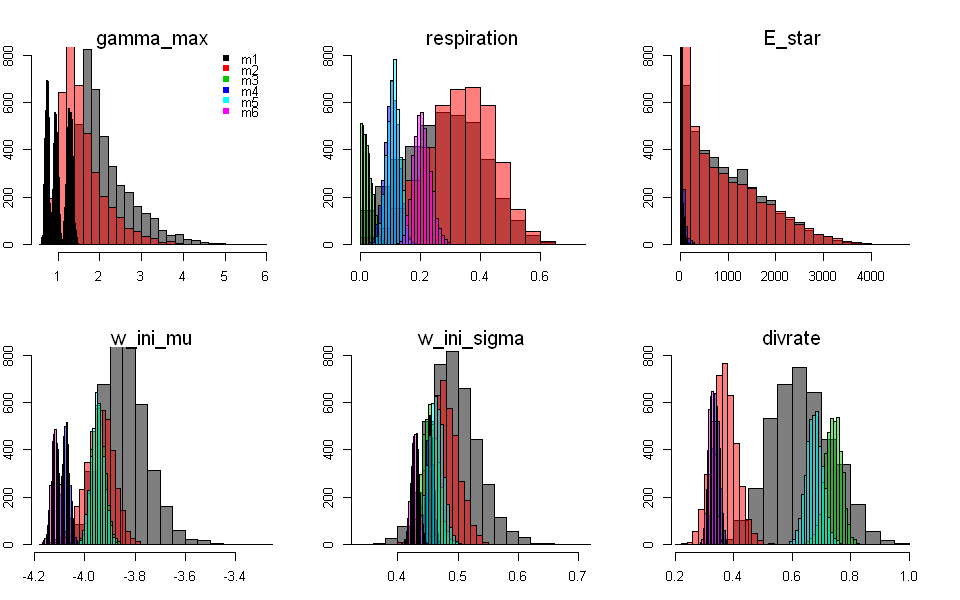

In [16]:
options(repr.plot.width=8, repr.plot.height=5)
par(mfrow=c(2,3),mar=c(3,2,3,3))
for(i in 1:length(pars)){
    hist(PARS_sf[,i,1],main='',breaks=20,xlab='',freq=TRUE,
         xlim=range(c(PARS_sf[,i,])),col=adjustcolor('black',alpha.f=0.5),ylim=c(0,800))
    for(j in 2:length(models)){
        hist(PARS_sf[,i,j],main='',,breaks=20,xlab='',freq=TRUE,col=adjustcolor(j,alpha.f=0.5),add=TRUE)
    }
    mtext(pars[i])
    if(i==1)
        legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
}


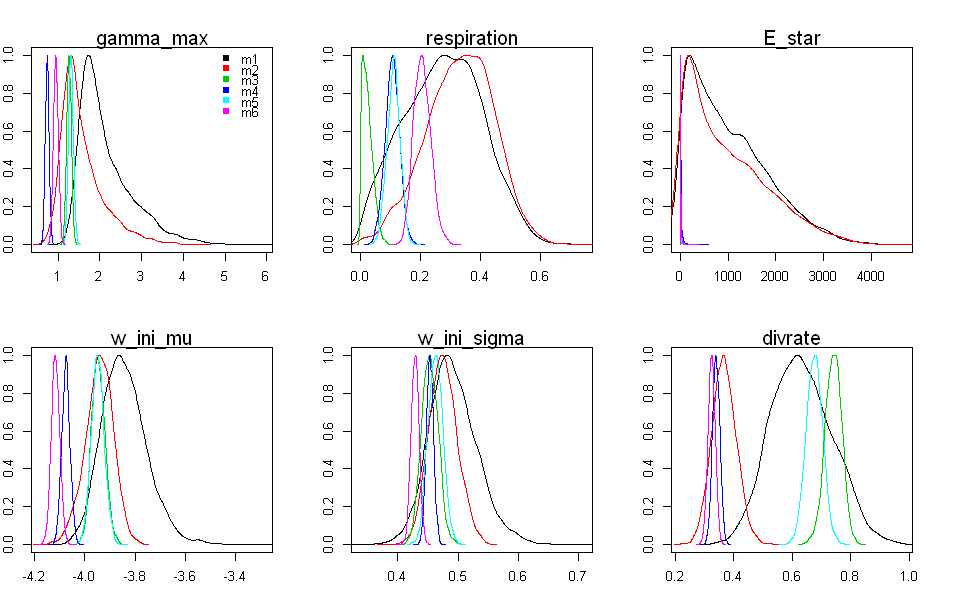

In [30]:
options(repr.plot.width=8, repr.plot.height=5)
par(mfrow=c(2,3),mar=c(3,2,3,3))
for(i in 1:length(pars)){
    xtmp <- PARS_sf[,i,1]
    d <- density(xtmp)
    plot(d$x,d$y/max(d$y),xlab='', xlim=range(c(PARS_sf[,i,])),col='black',type='l')
    for(j in 2:length(models)){
        xtmp <- PARS_sf[,i,j] 
        d <- density(xtmp)
        lines(d$x,d$y/max(d$y),col=j)
    }
    mtext(pars[i])
    if(i==1)
        legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
}


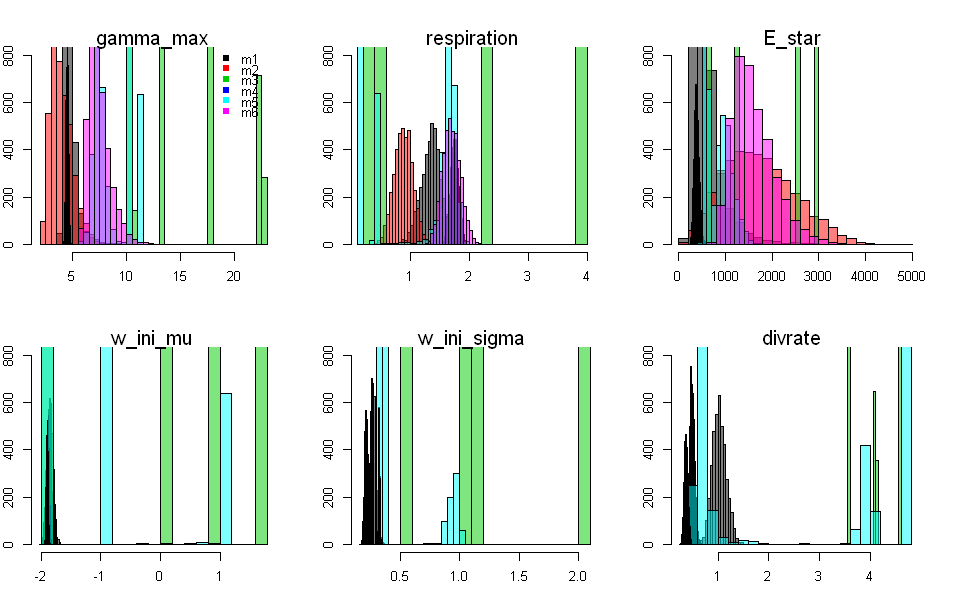

In [19]:
options(repr.plot.width=8, repr.plot.height=5)
par(mfrow=c(2,3),mar=c(3,2,3,3))
for(i in 1:length(pars)){
    hist(PARS_zn[,i,1],main='',breaks=20,xlab='',freq=TRUE,xlim=range(c(PARS_zn[,i,])),col=adjustcolor('black',alpha.f=0.5),
        ylim=c(0,800))
    for(j in 2:length(models)){
        hist(PARS_zn[,i,j],main='',,breaks=20,xlab='',freq=TRUE,col=adjustcolor(j,alpha.f=0.5),add=TRUE)
    }
    mtext(pars[i])
    if(i==1)
        legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
}

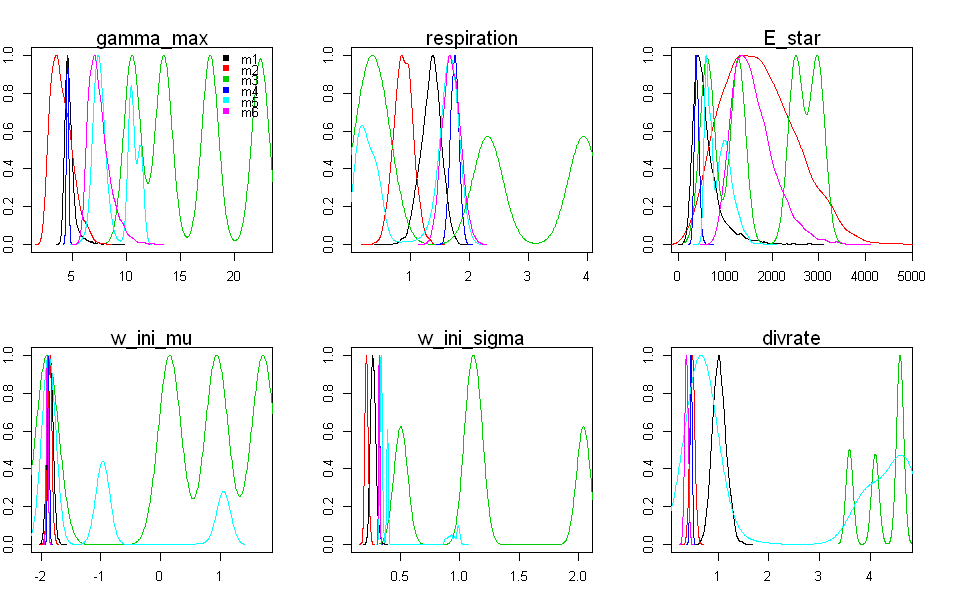

In [32]:
options(repr.plot.width=8, repr.plot.height=5)
par(mfrow=c(2,3),mar=c(3,2,3,3))
for(i in 1:length(pars)){
    xtmp <- PARS_zn[,i,1]
    d <- density(xtmp)
    plot(d$x,d$y/max(d$y),xlab='', xlim=range(c(PARS_zn[,i,])),col='black',type='l')
    for(j in 2:length(models)){
        xtmp <- PARS_zn[,i,j] 
        d <- density(xtmp)
        lines(d$x,d$y/max(d$y),col=j)
    }
    mtext(pars[i])
    if(i==1)
        legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
}